In [ ]:
import os
import re
from tqdm import tqdm
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

chemin = "/content/drive/My Drive/data"

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None


def concordancier(dossier, mot_cible, contexte, extrait=1000):
    lignes_df = []

    for fichier in tqdm(os.listdir(dossier)):
        if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
            date_document = extraire_date(fichier)

            if date_document:
                with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                    longue_chaine = f.read()

                mots = re.findall(r'\b\w+\b', longue_chaine.lower())
                indices = [i for i, mot in enumerate(mots) if mot == mot_cible.lower()]

                for index in indices:
                    debut = max(0, index - extrait)
                    fin = min(len(mots), index + extrait + 1)
                    extrait_complet = mots[debut:fin]
                    texte_total = ' '.join(extrait_complet)

                    contexte_avant = mots[max(0, index - contexte):index]
                    contexte_apres = mots[index + 1:min(len(mots), index + 1 + contexte)]

                    lignes_df.append({
                        'date': date_document,
                        'contexte_avant': ' '.join(contexte_avant),
                        'mot_cible': mot_cible,
                        'contexte_apres': ' '.join(contexte_apres),
                        'texte_total': texte_total
                    })
    df_concord = pd.DataFrame(lignes_df)
    return df_concord

# ============================
dossier = chemin
mot_cible = "canal"
contexte = 8
longueur_extrait = 800

concordances = concordancier(dossier, mot_cible, contexte, extrait=longueur_extrait)
concordances.head()
dates = concordances['date'].unique()
dates_liste = dates.tolist()
print(f'{len(dates_liste)} séances mentionnent le terme "{mot_cible}"')

concordances.to_csv(f"/content/drive/My Drive/resultats/{mot_cible}_exact.csv", index=False, encoding='utf-8')
#=====================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 7166/7166 [07:38<00:00, 15.64it/s]


1753 séances mentionnent le terme "canal"


In [ ]:
import string
with open('/content/drive/My Drive/resultats/french_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords_fr = set([line.strip().lower() for line in f])

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = re.sub(r'\d+', '', texte)  # enlever les chiffres
    texte = texte.translate(str.maketrans('', '', string.punctuation))  # enlever ponctuation
    mots = texte.split()
    mots = [mot for mot in mots if mot not in stopwords_fr and len(mot) > 2]

    return ' '.join(mots)


concordances['texte_total_nettoye'] = concordances['texte_total'].apply(nettoyer_texte)

In [ ]:
mot_cible = "canal"
concordances = pd.read_csv(f"/content/drive/My Drive/resultats/{mot_cible}_exact.csv")
concordances.head()
dates = concordances['date'].unique()
dates_liste = dates.tolist()
print(f'{len(dates_liste)} séances mentionnent le terme "{mot_cible}"')

1753 séances mentionnent le terme "canal"


In [ ]:
import os
import re
from tqdm import tqdm
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

chemin = "/content/drive/My Drive/data"

def extraire_date(nom_fichier):
    match = re.match(r"(\d{4}-\d{2}-\d{2})", nom_fichier)
    if match:
        return match.group(1)
    return None


def concordancier(dossier, mot_cible, contexte, extrait=1000):
    lignes_df = []

    for fichier in tqdm(os.listdir(dossier)):
        if fichier.endswith('.txt') and fichier != "french_stopwords.txt":
            date_document = extraire_date(fichier)

            if date_document:
                with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
                    longue_chaine = f.read()

                mots = re.findall(r'\b\w+\b', longue_chaine.lower())
                indices = [i for i, mot in enumerate(mots) if mot_cible.lower() in mot]

                for index in indices:
                    debut = max(0, index - extrait)
                    fin = min(len(mots), index + extrait + 1)
                    extrait_complet = mots[debut:fin]
                    texte_total = ' '.join(extrait_complet)

                    contexte_avant = mots[max(0, index - contexte):index]
                    contexte_apres = mots[index + 1:min(len(mots), index + 1 + contexte)]

                    lignes_df.append({
                        'date': date_document,
                        'contexte_avant': ' '.join(contexte_avant),
                        'mot_cible': mot_cible,
                        'contexte_apres': ' '.join(contexte_apres),
                        'texte_total': texte_total
                    })
    df_concord = pd.DataFrame(lignes_df)
    return df_concord

# ============================
dossier = chemin
mot_cible = "train" #<== changer ici le mot cible
contexte = 8
longueur_extrait = 800

concordances = concordancier(dossier, mot_cible, contexte, extrait=longueur_extrait)
concordances.head()
dates = concordances['date'].unique()
dates_liste = dates.tolist()
print(f'{len(dates_liste)} séances mentionnent le terme "{mot_cible}"')

concordances.to_csv(f"/content/drive/My Drive/resultats/{mot_cible}.csv", index=False, encoding='utf-8')
#=====================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 7166/7166 [06:08<00:00, 19.46it/s]


5725 séances mentionnent le terme "train"


In [ ]:
from collections import Counter
import re

def extraire_formes_mot(df, mot_cible):
    mots_trouves = []

    for texte in df['texte_total']:
        mots = re.findall(r'\b\w+\b', texte.lower())
        formes = [mot for mot in mots if mot_cible in mot]
        mots_trouves.extend(formes)

    compteur_formes = Counter(mots_trouves)

    formes_uniques = compteur_formes.most_common()

    return formes_uniques


In [ ]:
formes_trouvees = extraire_formes_mot(concordances, mot_cible)

print(f"Formes dérivées rencontrées pour '{mot_cible}':")
for mot, freq in formes_trouvees:
    print(f"- {mot} (x{freq})")


Formes dérivées rencontrées pour 'canal':
- canal (x67119)
- canalisation (x550)
- uncanal (x122)
- lecanal (x115)
- cecanal (x114)
- canalisée (x104)
- lecanalde (x85)
- canald (x71)
- canalisations (x68)
- canalisé (x63)
- canalduberry (x58)
- pontcanal (x52)
- canaldunord (x51)
- canalde (x45)
- canals (x39)
- ducanaldu (x37)
- ducanalde (x37)
- esttrouveraitdanslecanal (x36)
- unregardducanal (x36)
- constructionducanaldemoucanalduoinstantpourl (x34)
- llletececanal (x34)
- leprodtlltdutrafirsurcecanal (x34)
- canaldesdeux (x31)
- consactionducanaldemoulinsàsancoms (x31)
- largetrentationducanalduberryet (x31)
- canal1 (x30)
- ducanalduberry (x29)
- constructionducanaldneraulins (x29)
- canalw (x28)
- canalisées (x27)
- effetcecanal (x27)
- canaldurhõneouducanal (x26)
- canalas (x25)
- canaldéclarentq (x25)
- constructionducanal (x25)
- lecanaltransporte (x25)
- canalisationseraitabsolument (x25)
- laconstructioilcanal (x24)
- iecanaldes (x24)
- cettehgnlecanalisation (x24)
- ducan

In [ ]:
def compter_occurrences_par_document(df, mot_cible):
    comptes_par_doc = []

    for texte in df['texte_total']:
        mots = re.findall(r'\b\w+\b', texte.lower())
        compte = sum(1 for mot in mots if mot == mot_cible)
        comptes_par_doc.append(compte)

    total = sum(comptes_par_doc)
    return comptes_par_doc, total


In [ ]:
comptes_par_doc, total = compter_occurrences_par_document(concordances, 'canal')
print(f"Occurrences par document : {comptes_par_doc}")
print(f"Nombre total d'occurrences dans tous les documents : {total}")


Occurrences par document : [1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 5, 4, 1, 1, 1, 1, 3, 3, 3, 1, 2, 4, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 7, 5, 5, 5, 5, 3, 6, 6, 6, 6, 6, 6, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 2, 2, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 1, 2, 2, 4, 5, 5, 9, 11, 10, 10, 11, 11, 14, 15, 16, 15, 14, 14, 15, 15, 15, 14, 13, 11, 10, 10, 9, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 3, 3, 3, 1, 7, 7, 8, 8, 8, 8, 9, 9, 6, 5, 5, 9, 8, 8, 8, 8, 8, 8, 8, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 10, 10, 10, 10, 11, 11, 11, 11, 12, 16, 16, 18, 17, 19, 21, 22, 23, 23, 24, 24, 23, 23, 23, 24, 24, 24, 22, 23, 22, 22, 21, 20, 20, 18, 13, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1

In [ ]:
len(formes_trouvees)

765

In [ ]:
# ============
# Analyse Diachronique

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

def mots_autour(df, periode='10Y', context_col='texte_total_nettoye', mot_cible='canal'):
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')

    resultats = {}

    for period, group in df.groupby(pd.Grouper(freq=periode.replace('Y', 'YE'))):
        mots = []
        for texte in group[context_col]:
            tokens = re.findall(r'\b\w+\b', texte.lower())
            context_mots = [t for t in tokens if mot_cible not in t and len(t) > 2]
            mots.extend(context_mots)

        freqs = Counter(mots).most_common(20)
        resultats[period.strftime('%Y')] = freqs

    return resultats


In [ ]:
def afficher_wordclouds(resultats, mot_cible):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    for periode, freqs in resultats.items():
        wc = WordCloud(width=800, height=400).generate_from_frequencies(dict(freqs))
        plt.figure(figsize=(10, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Contexte autour de '{mot_cible}' - {periode}")
        plt.show()


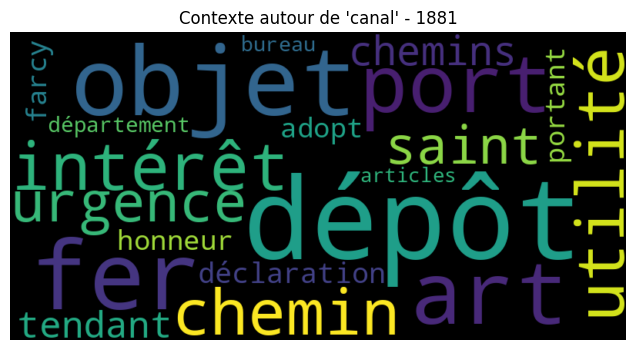

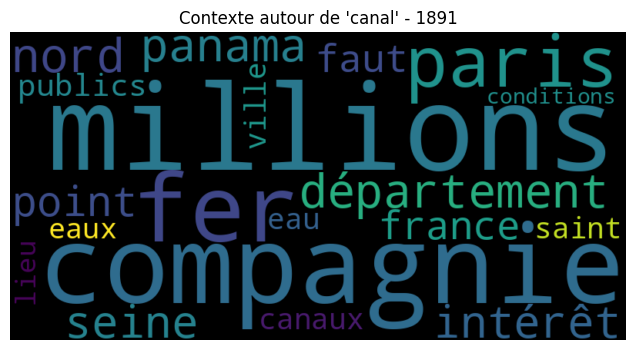

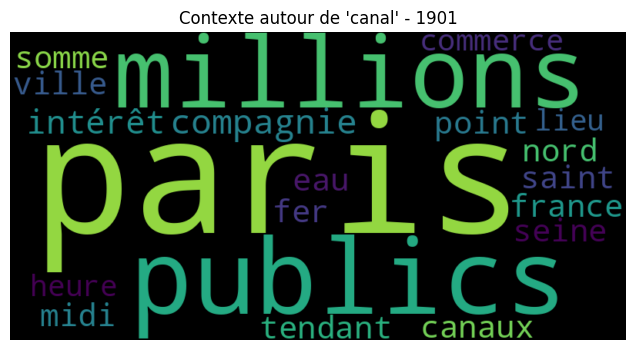

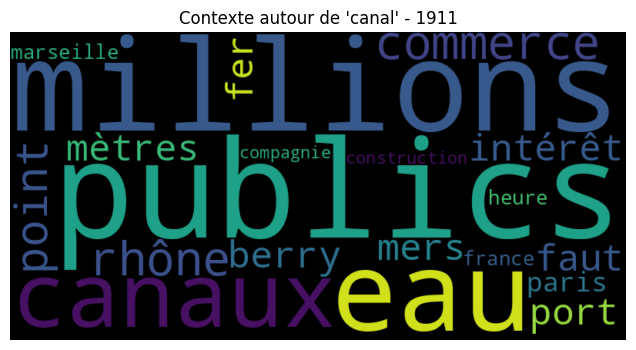

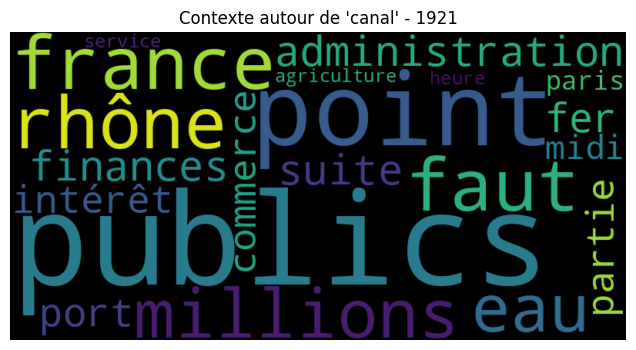

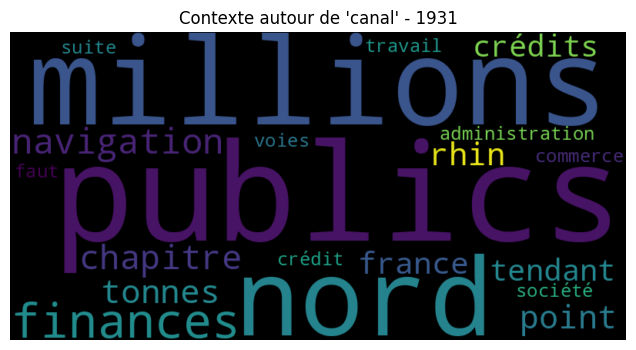

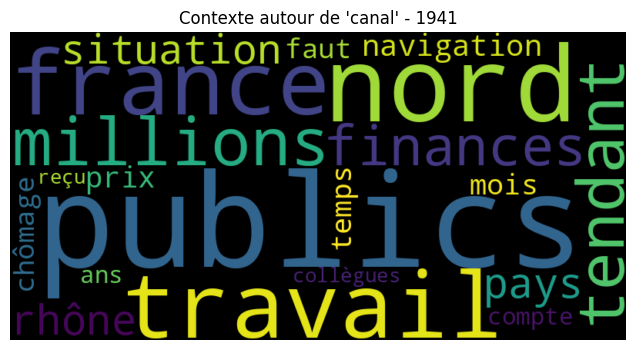

In [ ]:
mot_cible = 'canal'
resultats = mots_autour(concordances, mot_cible=mot_cible)
afficher_wordclouds(resultats, mot_cible)


In [ ]:

concordances['date'] = pd.to_datetime(concordances['date'])
concordances['periode'] = concordances['date'].dt.year // 10 * 10

groupes_par_periode = concordances.groupby('periode')


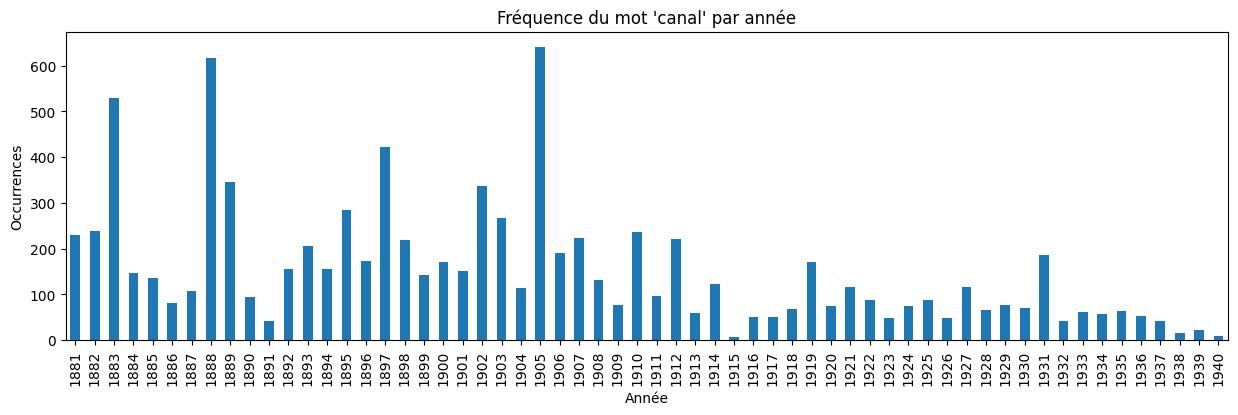

In [ ]:
freqs_par_annee = concordances.groupby(concordances['date'].dt.year).size()

freqs_par_annee.plot(kind='bar', figsize=(15,4), title=f"Fréquence du mot '{mot_cible}' par année")
plt.xlabel("Année")
plt.ylabel("Occurrences")
plt.show()


In [ ]:
Afficher les occurences de 1905 pour comprendre pourquoi il y en a autant, et aussi en 1915 pourquoi il y en a si peu